A zoologist obtained measurements of the mass (in grams), the snout-vent length (SVL) and hind
limb span (HLS) in mm of 25 lizards. The mean and covariance matrix of the data about the mean
are given below.

The largest eigenvalue of the above covariance matrix is 250.4. Determine the normalized eigenvector corresponding to this eigenvalue. Also determine the remaining eigenvalues and corresponding mutually orthogonal eigenvectors.

How many principal components should be retained, if at least 95% of the variance in the data has to be captured.

Assuming that there are two linear relationships among the three variables, determine one possible set of these linear relations.

Using the PCA model, determine the scores for a female lizard with the following measurements: mass = 10.1 gms, SVL = 73mm and HLS = 135.5mm.

Using the PCA model, estimate the mass of a lizard whose measured SVL is 73mm.

Using the PCA model, estimate the mass of a lizard whose measured SVL is 73mm and measured HLS is 135.5 mm.

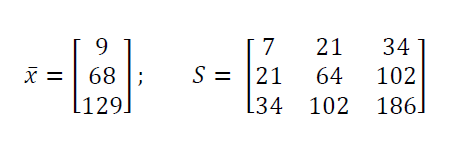

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Importing necessary libraries.

In [2]:
import scipy.io
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

Given covariance matrix as S.

In [3]:
S=[[7,21,34],[21,64,102],[34,102,186]]

Calculating the eigenvalues and eigenvectors.

In [4]:
eig_vals, eig_vecs = np.linalg.eig(S)
print(len(eig_vals))
print(eig_vecs.shape)

3
(3, 3)


In [5]:
# Printing the Eigen vectors and Eigen values
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[ 0.16191025  0.95890336 -0.23300092]
 [ 0.48767833 -0.28302089 -0.8258747 ]
 [ 0.85787815 -0.02008808  0.51346037]]

 Eigen Values 
%s [2.50400915e+02 8.95711992e-02 6.50951385e+00]


To know the variance explained by the individual PC, pair up the respective eigen vectors and values.

In [6]:
eigen_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
eigen_pairs_sorted = sorted(eigen_pairs, reverse=True)

In [7]:
eig_vals_sorted = [eigen_pairs_sorted[i][0] for i in range (len(eig_vals))]
eig_vecs_sorted = [eigen_pairs_sorted[i][1] for i in range (len(eig_vals))]

In [8]:
# Cumulative Variance Explained:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 97.43226263  99.96514739 100.        ]


The first principal component should be retained, if at least 95% of the variance in the data has to be captured.

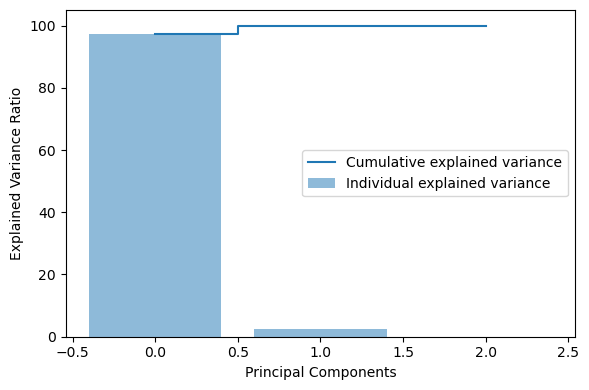

In [9]:
# Summary Plot of the cumulative Variance Explained:

plt.figure(figsize=(6 , 4))
plt.bar(range(3), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(3), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

Printing the decomposition of covariance matrix using SVD.

In [10]:
U,D,VT=np.linalg.svd(S)
print("loadings",U)
print("scores",VT)
print(D)

loadings [[-0.16191025 -0.23300092 -0.95890336]
 [-0.48767833 -0.8258747   0.28302089]
 [-0.85787815  0.51346037  0.02008808]]
scores [[-0.16191025 -0.48767833 -0.85787815]
 [-0.23300092 -0.8258747   0.51346037]
 [-0.95890336  0.28302089  0.02008808]]
[2.50400915e+02 6.50951385e+00 8.95711992e-02]


To determine one possible set of the linear relations between the three variables, taking one PC with high eigen value and forming the relationship.

In PCA, given a mean centered dataset **X** with **n** samples and **p** variables, the first principal component **PC1** is given by the linear combination of the original variables **X1,X2,...Xp**

                PC1=w11*X1 + w12*X2 +........w1p*Xp

The first principal component PC1 represents the component that retains the maximum variance of the data. **w1** corresponds to an eigenvector of the covariance matrix and the elements of the eigenvector 
**w11,...** and are also known as loadings.

PCA loadings are the coefficients of the linear combination of the original variables from which the principal components (PCs) are constructed.

Therefore, the linear relationship between the variables is

PC1=(-0.161)*(mass) + (-0.233)*(SVL) + (-0.958)*(HLS)

PC2=(-0.487)*(mass) + (-0.825)*(SVL) + (0.283)*(HLS)

PC3=(-0.857)*(mass) + (0.513)*(SVL) + (0.02)*(HLS)

Using the PCA model, determine the scores for a female lizard with the following measurements: mass = 10.1 gms, SVL = 73mm and HLS = 135.5mm.

In [11]:
PC1=(-0.161)*(10.1) + (-0.233)*(73) + (-0.958)*(135.5)
print(PC1)

-148.4441


The scores of the model are

[[-0.16191025 -0.48767833 -0.85787815]

 [-0.23300092 -0.8258747   0.51346037]
 
 [-0.95890336  0.28302089  0.02008808]]


**RECONSTRUCTION OF DATA:**


To reconstruct an observation xi using K principal components, we follow these steps:

* Center the observation by subtracting the mean m: xi = xi - m

* Project the centered observation onto the first K principal components to obtain a K-dimensional representation: zi = P' * x_i, where P' is the transpose of P (principal components matrix).

* Reconstruct the observation using the K-dimensional representation and the first K principal components: xi^ = P * zi

* Add back the mean m to the reconstructed observation: xi^ = xi^ + m

The reconstructed observation xi^ is an approximation of the original observation xi using K principal components.

Using the PCA model, estimate the mass of a lizard whose measured SVL is 73mm.

Here,we have the observation for variable SVL only. So lets take the remaining variables observations as their mean since we have no data for them. Also taking the top 2 PCs for the reconstruction.

In [22]:
# Reverse PCA transformation

data=np.array([9 ,73,129])

# given mean of the data
mean=np.array([9,68,129])

# centering the observation
mean_data=data-mean

# taking top 2 PCs
pca_data = mean_data.dot(eig_vecs[:,:2])
recon_data = pca_data.dot(eig_vecs[:,:2].T) + mean

print(recon_data)

[  8.03785218  69.58965488 131.12026964]


**CONCLUSION 1:** From the above output, the estimated mass of a lizard whose measured SVL given as 73mm is 8.037.

Using the PCA model, estimate the mass of a lizard whose measured SVL is 73mm and measured HLS is 135.5 mm.

Here,we have the observation for variables SVL and HLS  only. So lets take the remaining variable observation as its mean since we have no data for it.

In [23]:
# Reverse PCA transformation

data=np.array([9 ,73,135.5])

# given mean of the data
mean=np.array([9,68,129])

# centering the observation
mean_data=data-mean

# taking top 2 PCs
pca_data = mean_data.dot(eig_vecs[:,:2])
recon_data = pca_data.dot(eig_vecs[:,:2].T) + mean

print(recon_data)

[  8.81549097  72.34600541 135.90659957]


**CONCLUSION 2:** From the above output, the estimated mass of a lizard whose measured SVL given as 73mm is 8.815.